In [2]:
%matplotlib inline



import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lon_range = (116.60, 116.90)
lat_range = (-21.80, -22.05)
#time_range = ('2022-01-15', '2023-02-15')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m","B12_20m"],
             x=lon_range,
             y=lat_range,
             
             output_crs='EPSG:6933',
             resolution=(-30, 30))
print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 989, x: 965)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-02T02:23:54.553000 2019-01-05T...
  * y            (y) float64 -2.716e+06 -2.716e+06 ... -2.746e+06 -2.746e+06
  * x            (x) float64 1.125e+07 1.125e+07 ... 1.128e+07 1.128e+07
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 0 0 0 0 0 0 0 ... 952 990 842 819 762 1064
    B03_10m      (time, y, x) uint16 0 0 0 0 0 0 0 ... 628 625 624 573 529 639
    B02_10m      (time, y, x) uint16 0 0 0 0 0 0 0 ... 392 373 403 348 336 400
    B08_10m      (time, y, x) uint16 0 0 0 0 0 0 ... 1287 1260 1229 1145 1459
    B12_20m      (time, y, x) uint16 0 0 0 0 0 0 ... 1582 1608 1548 1572 1987
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


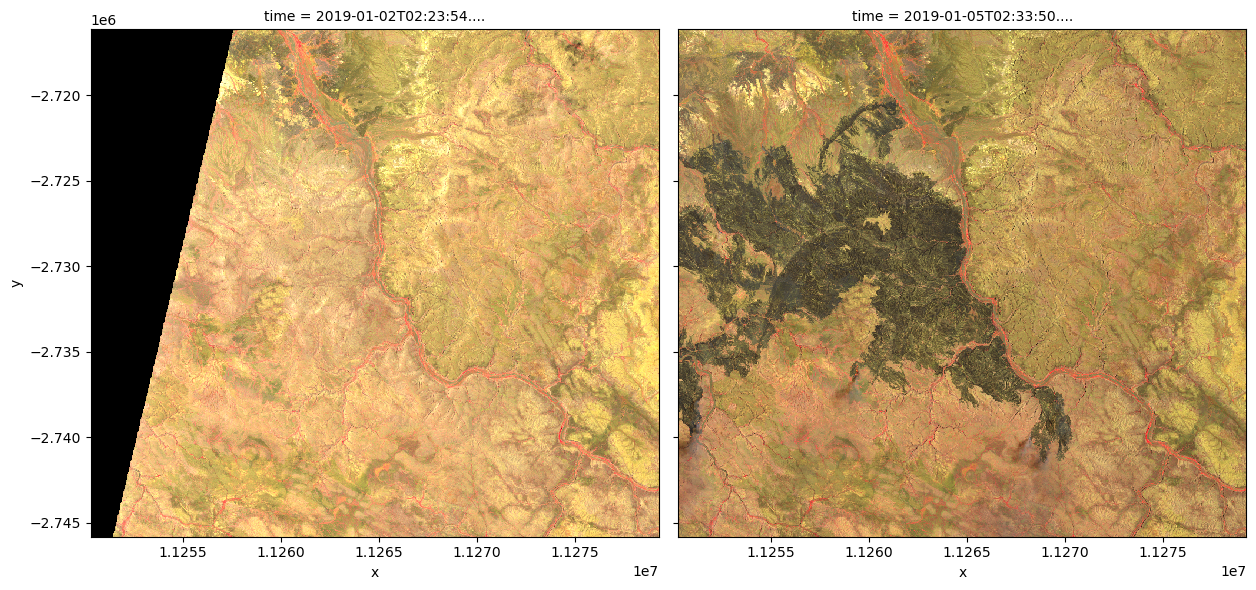

In [3]:
dataset = ds

rgb(ds, bands=['B08_10m', 'B04_10m', 'B03_10m'], index=[0, 1])

In [4]:
dataset =  odc.algo.to_f32(dataset)

band_diff = dataset.B08_10m - dataset.B12_20m
band_sum = dataset.B08_10m + dataset.B12_20m

nbr=band_diff / band_sum
print(nbr)

<xarray.DataArray (time: 2, y: 989, x: 965)>
array([[[        nan,         nan,         nan, ..., -0.15284716,
         -0.15832904, -0.18623291],
        [        nan,         nan,         nan, ..., -0.14590043,
         -0.16334864, -0.2571991 ],
        [        nan,         nan,         nan, ..., -0.14401212,
         -0.1391635 , -0.22441134],
        ...,
        [        nan,         nan,         nan, ..., -0.11636149,
         -0.15923929, -0.16633466],
        [        nan,         nan,         nan, ..., -0.12345307,
         -0.17109145, -0.12190431],
        [        nan,         nan,         nan, ..., -0.13083257,
         -0.17268589, -0.15951973]],

       [[-0.11504425, -0.07712419, -0.09828824, ..., -0.1786543 ,
         -0.16681695, -0.20570152],
        [-0.1203654 , -0.08187719, -0.01490349, ..., -0.16840278,
         -0.18107864, -0.26230925],
        [-0.08803502, -0.107294  , -0.05769231, ..., -0.16900149,
         -0.1555031 , -0.24424225],
        ...,
        [

<Figure size 1200x1200 with 0 Axes>

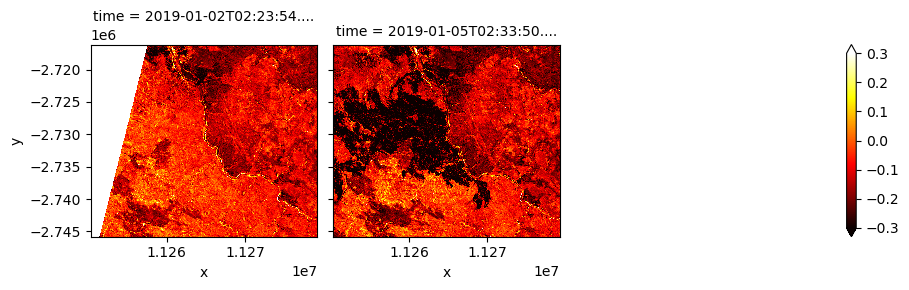

In [5]:
plt.figure(figsize=(12,12))
nbr.plot(col='time', cmap="hot", vmin=-0.3, vmax=0.3, col_wrap=3)
plt.show()